In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import string
from collections import defaultdict, Counter

from sklearn.feature_extraction.text import CountVectorizer

import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer,WordNetLemmatizer
from nltk.tokenize import word_tokenize


from wordcloud import WordCloud, STOPWORDS
%matplotlib inline

In [90]:
df = pd.read_csv('Datasets/df.csv')
df = df.drop(['Unnamed: 0'], axis=1)

df_fake = df.loc[df['class'] == 0]

df_true = df.loc[df['class'] == 1]

df

,Tweets,class
0,dr francis boyle creator of bioweapons act say...,0
1,the cdc reports a covid vaccination disparity ...,1
2,the decision to go ahead on the coronavirus pa...,0
3,vitamin c protects against coronavirus,0
4,many lawmakers and staff say that something ha...,1
...,...,...
1120,hospitals and some lawmakers say federal covid...,1
1121,at least half of the women surveyed by cnn bel...,1
1122,pfizer delays fda application for covid vaccin...,1
1123,us surgeon general dr vivek murthy announced f...,1


In [91]:
fake_ = df.groupby(['class']).size().values[0]
true_ = df.groupby(['class']).size().values[1]

features = df.groupby(['Tweets']).size().values[1]

In [93]:
fake_

432

([<matplotlib.axis.XTick at 0x7feff3a12fd0>,
 [Text(0, 0, 'Fake'), Text(1, 0, 'Not Fake')])

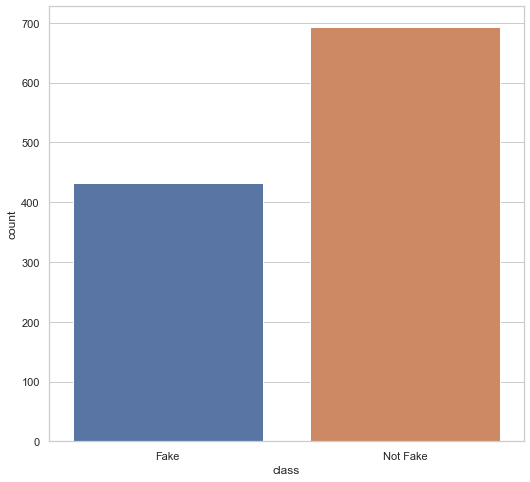

In [92]:
# create plot

plt.figure(figsize=(8.5,8))
sns.countplot(data=df,x='class')
plt.xticks(ticks=[0,1],labels=["Fake", 'Not Fake'])




array([<AxesSubplot:title={'center':'0'}>,
       <AxesSubplot:title={'center':'1'}>], dtype=object)

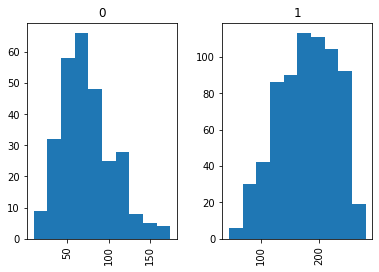

In [6]:
#  the number of characters present in each title by labels
df['Tweets'].str.len().hist(by=df['class'])

array([<AxesSubplot:title={'center':'0'}>,
       <AxesSubplot:title={'center':'1'}>], dtype=object)

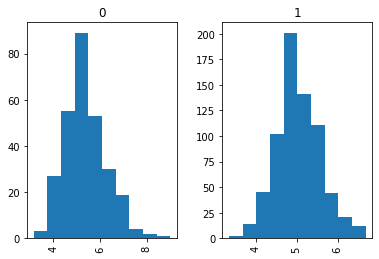

In [7]:
# Word level analysis of title
df['Tweets'].str.split().apply(lambda x:[len(i) for i in x]).map(lambda x: np.mean(x)).hist(by=df['class'])

<AxesSubplot:>

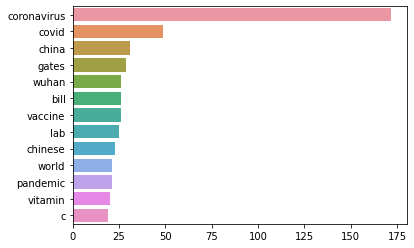

In [8]:
# Corpus analysis corpus_title_fake
stop=set(stopwords.words('english'))
# df_fake['Tweets'] = df_fake['Tweets'].str.lower()
# df_fake['Tweets'] = df_fake.Tweets.apply(lambda x: x.translate(str.maketrans('', '', string.punctuation)))
new = df_fake['Tweets'].str.split()
new=new.values.tolist()
corpus_title_fake=[word for i in new for word in i]

counter=Counter(corpus_title_fake)
most=counter.most_common()
x, y= [], []
for word,count in most[:25]:
    if (word not in stop):
        x.append(word)
        y.append(count)
        
sns.barplot(x=y,y=x)

<AxesSubplot:>

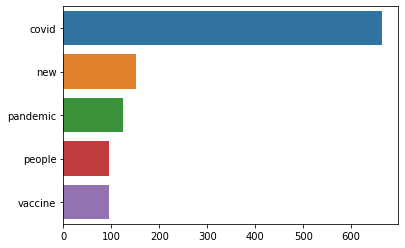

In [9]:
# Corpus analysis corpus_title_fake
stop=set(stopwords.words('english'))
# df_fake['Tweets'] = df_fake['Tweets'].str.lower()
# df_fake['Tweets'] = df_fake.Tweets.apply(lambda x: x.translate(str.maketrans('', '', string.punctuation)))
new = df_true['Tweets'].str.split()
new=new.values.tolist()
corpus_title_true=[word for i in new for word in i]

counter=Counter(corpus_title_true)
most=counter.most_common()
x, y= [], []
for word,count in most[:25]:
    if (word not in stop):
        x.append(word)
        y.append(count)
        
sns.barplot(x=y,y=x)

In [10]:
# Ngram analysis function

def get_top_ngram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(n, n)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) 
                  for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:10]

/var/folders/j2/64m37fcx0fx_w8wpmhz91lmh0000gn/T/ipykernel_66668/753989986.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fake['Tweets'] = df_fake['Tweets'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))


<AxesSubplot:>

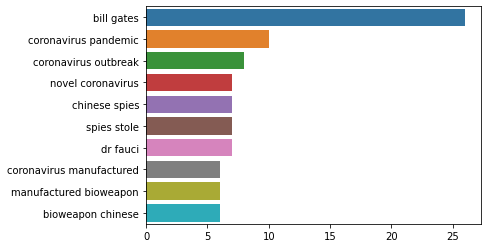

In [11]:
# Ngram analysis corpus_title_fake

# df_fake['Tweets'] = df_fake['Tweets'].str.lower()
# df_fake['Tweets'] = df_fake.Tweets.apply(lambda x: x.translate(str.maketrans('', '', string.punctuation)))
df_fake['Tweets'] = df_fake['Tweets'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))


top_n_bigrams=get_top_ngram(df_fake['Tweets'],2)[:10]
x,y=map(list,zip(*top_n_bigrams))
sns.barplot(x=y,y=x)

/var/folders/j2/64m37fcx0fx_w8wpmhz91lmh0000gn/T/ipykernel_66668/2878310882.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_true['Tweets'] = df_true['Tweets'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))


<AxesSubplot:>

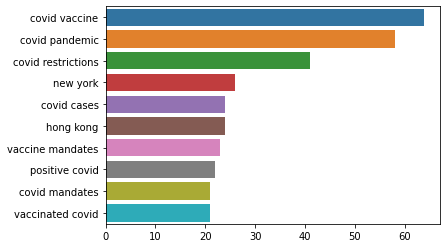

In [12]:
df_true['Tweets'] = df_true['Tweets'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

top_n_bigrams=get_top_ngram(df_true['Tweets'],2)[:10]
x,y=map(list,zip(*top_n_bigrams))
sns.barplot(x=y,y=x)

In [13]:
# Function for word cloud
stopwords = set(STOPWORDS)

def show_wordcloud(data):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=100,
        max_font_size=30,
        scale=3,
        random_state=1)
   
    wordcloud=wordcloud.generate(str(data))

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')

    plt.imshow(wordcloud)
    plt.show()

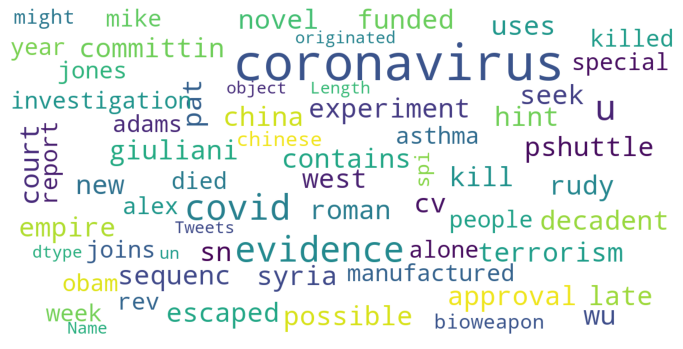

In [14]:
# Word cloud for corpus_title_fake
show_wordcloud(df_fake['Tweets'])

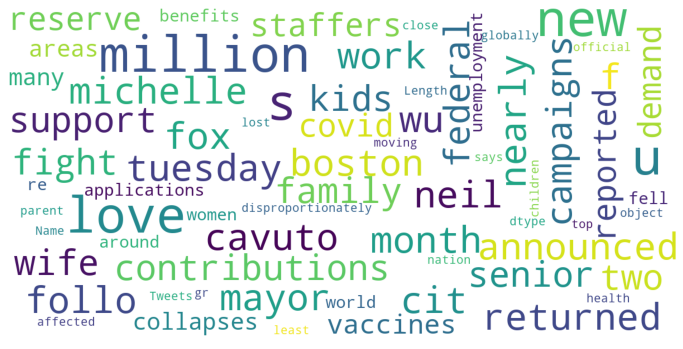

In [15]:
# Word cloud for corpus_title_True
show_wordcloud(df_true['Tweets'])